In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
#Since column names are complex lets change the names of the columns
df.columns=["Wins","Runs","At Bats","Hits","Doubles","Triples","Home Runs","Walks","Strike Outs","Stolen Bases","Runs Allowed","Earned Runs","Earned Run Average","Complete Game","Shutouts","Saves", "Errors"]

In [8]:
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
#Checking the null values(if any)
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Walks                 0
Strike Outs           0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

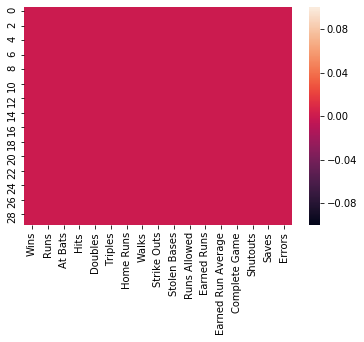

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
#Statitical Summary of the data
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Walks,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
#checking the correlation
dfcor=df.corr()

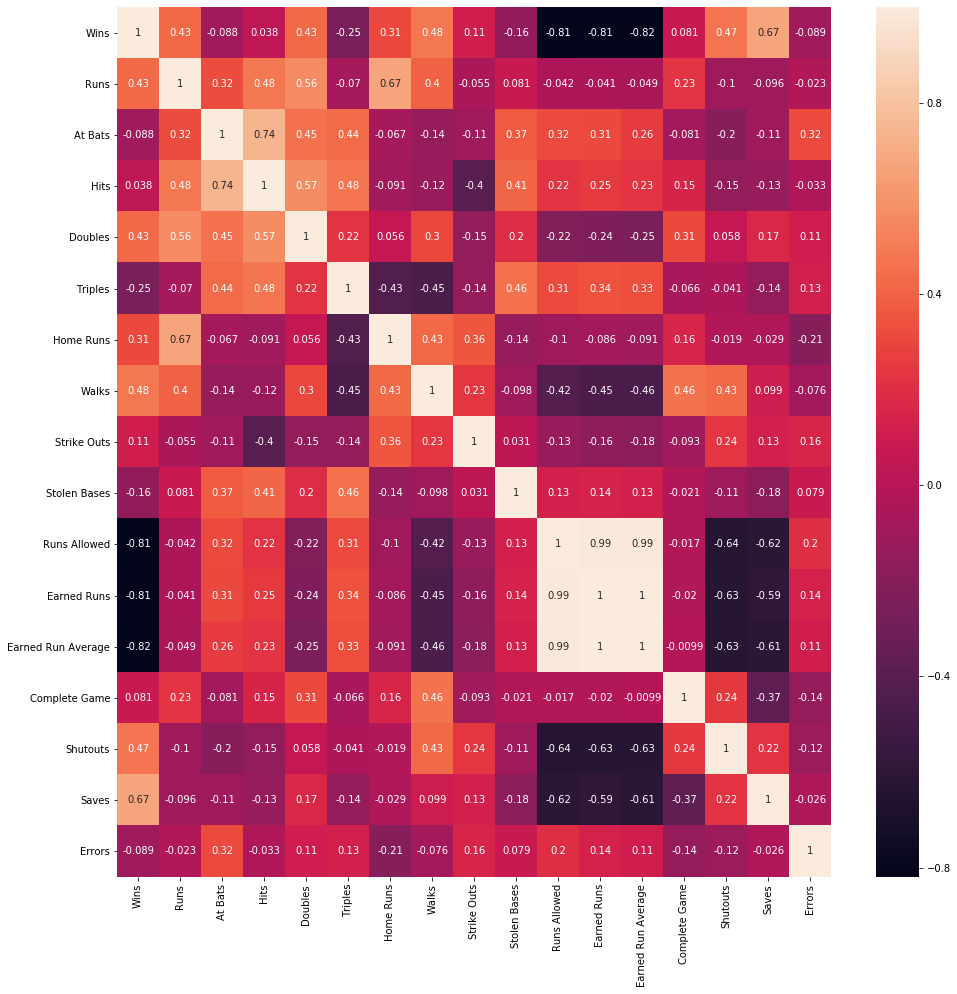

In [13]:
plt.figure(figsize=(16,16))
sns.heatmap(dfcor,annot=True)
plt.show()

In [14]:
# Univariate Analysis

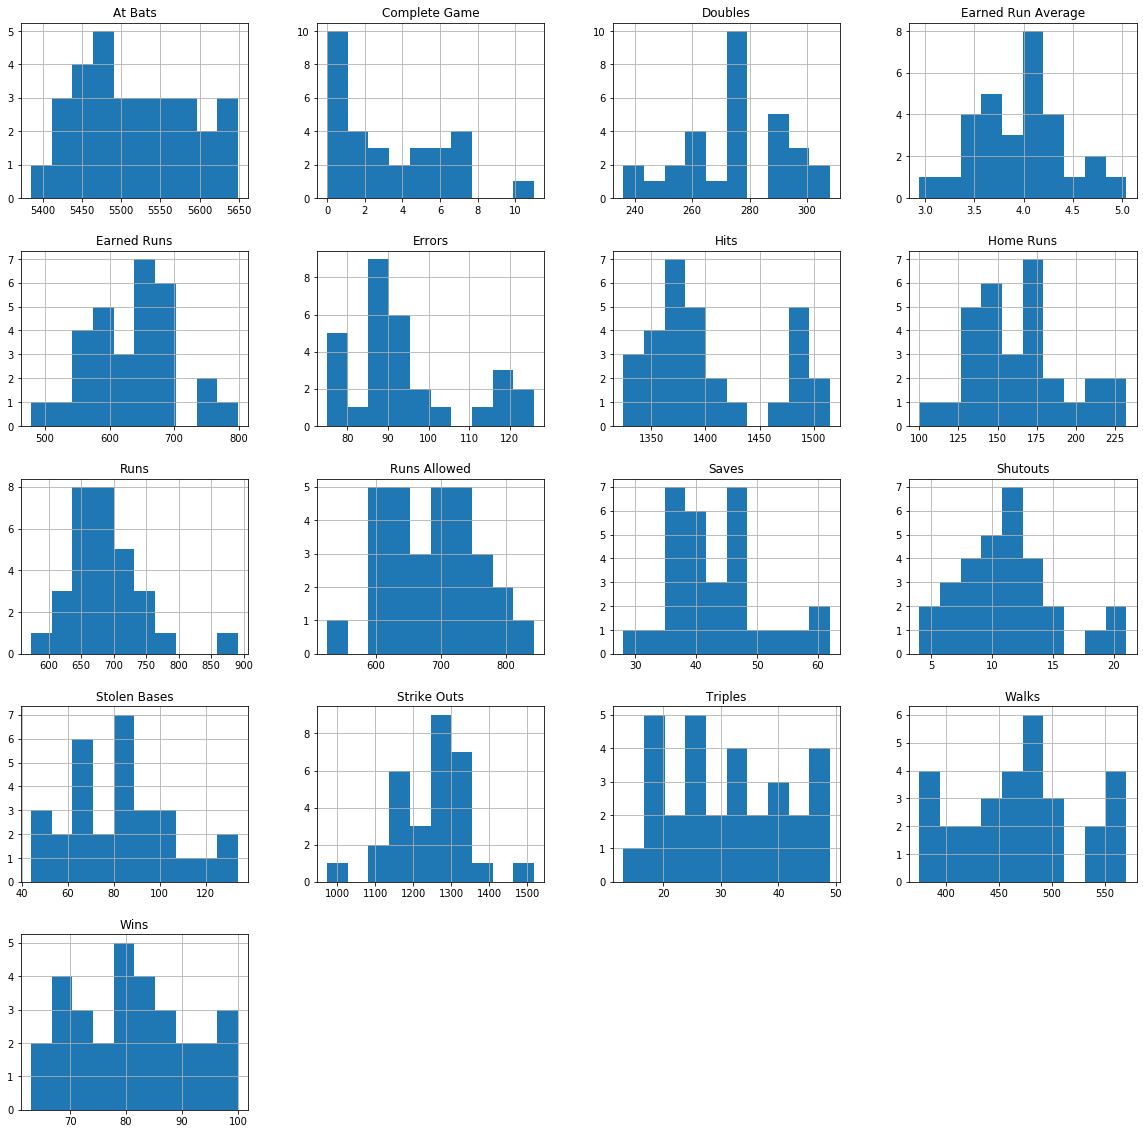

In [15]:
df.hist(figsize=(20,20))
plt.show()

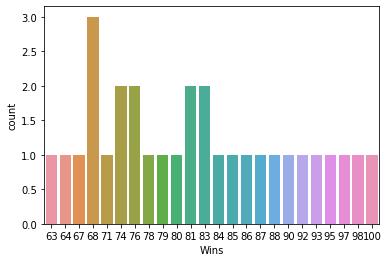

In [16]:
sns.countplot(df['Wins'])
plt.show()

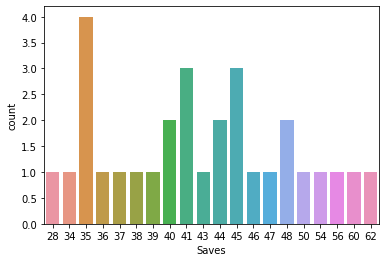

In [17]:
sns.countplot(df['Saves'])
plt.show()

In [18]:
#Bivariate Analysis

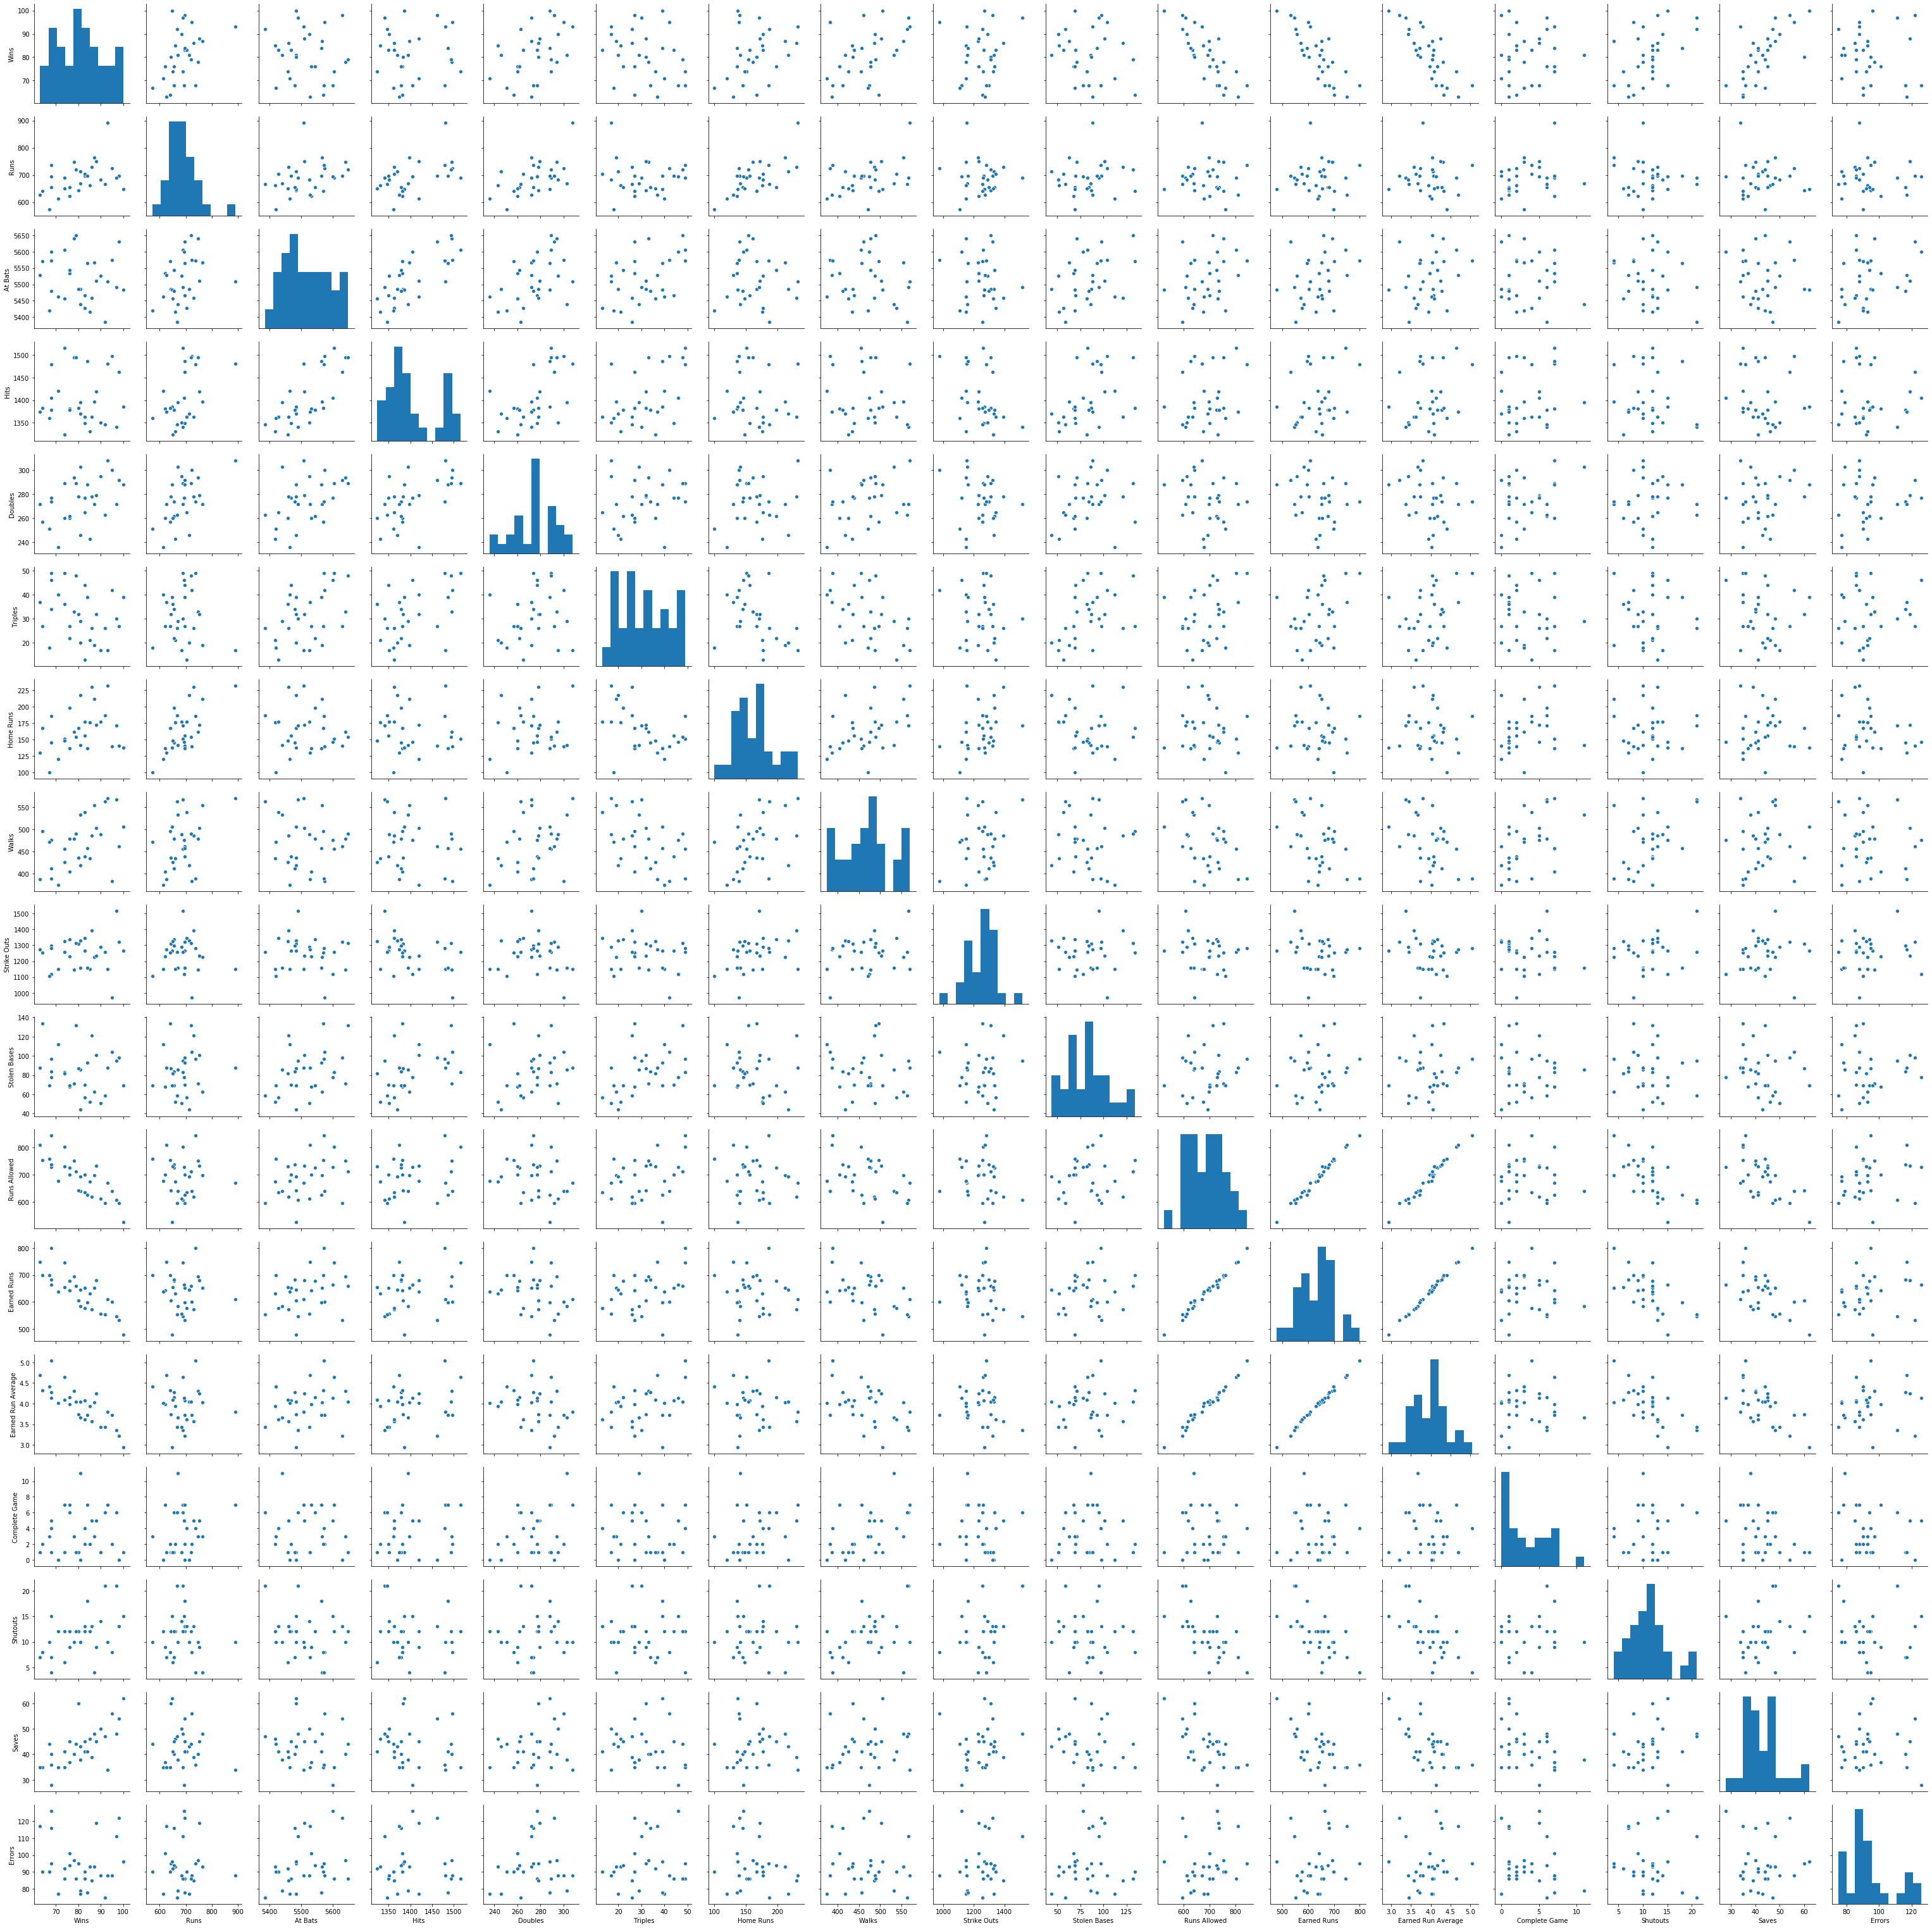

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
collist=df.columns.values
ncol=12
nrows=10

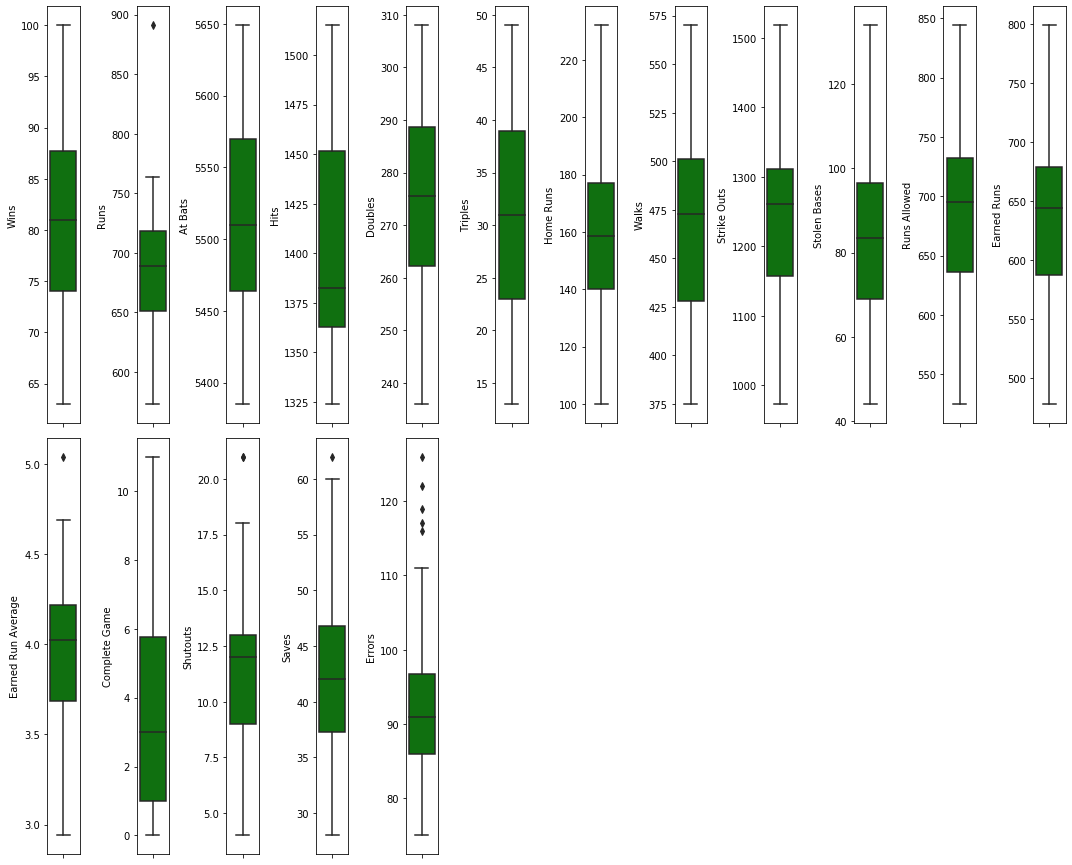

In [21]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

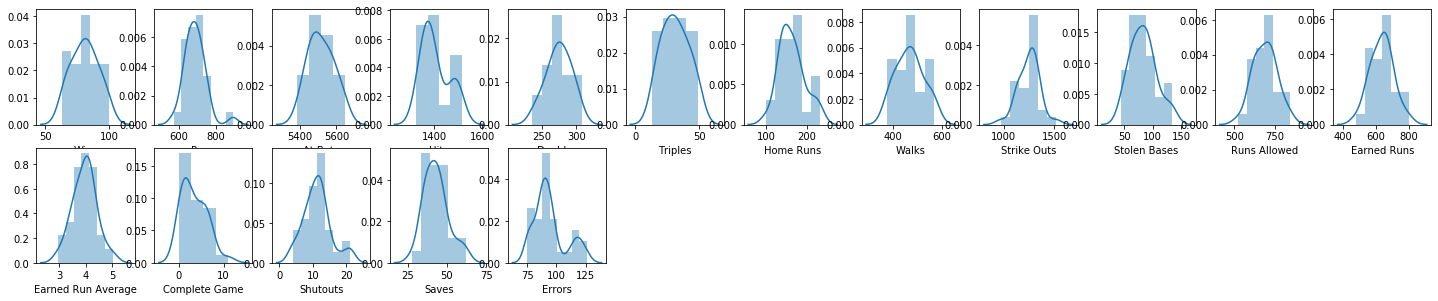

In [22]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

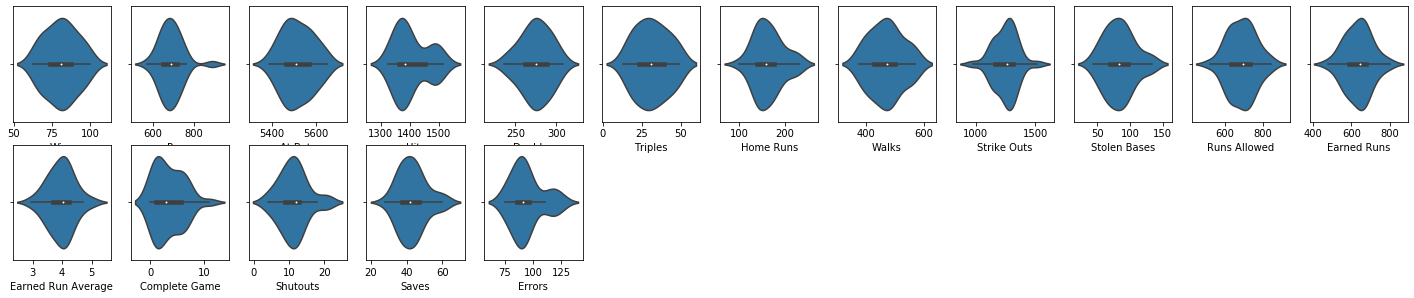

In [23]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.violinplot(df[collist[i]])

In [24]:
#Checking the skewness of the data
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Walks                 0.158498
Strike Outs          -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

In [25]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [26]:
#we have removed the skewness to maximum extent
df.skew()

Wins                  0.047089
Runs                  0.744813
At Bats               0.183437
Hits                  0.628584
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Walks                 0.158498
Strike Outs          -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game        -0.325962
Shutouts             -0.589640
Saves                 0.163057
Errors                0.632916
dtype: float64

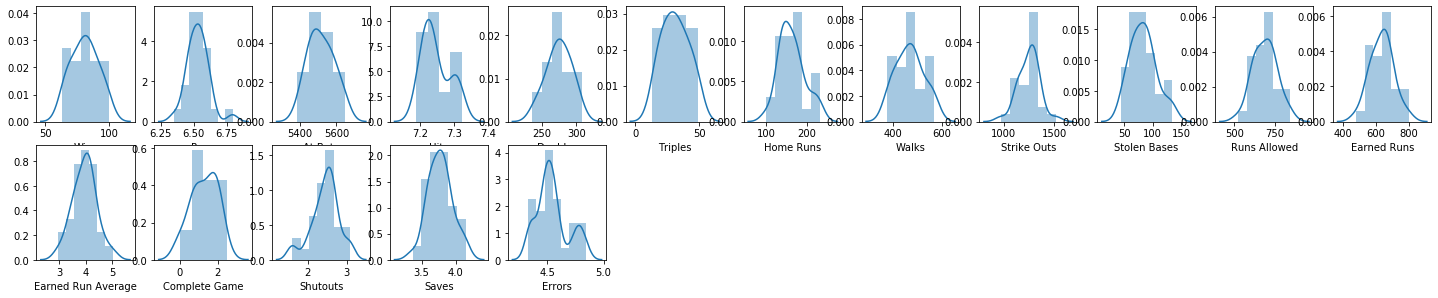

In [27]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [28]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(30, 17)

In [29]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(29, 17)

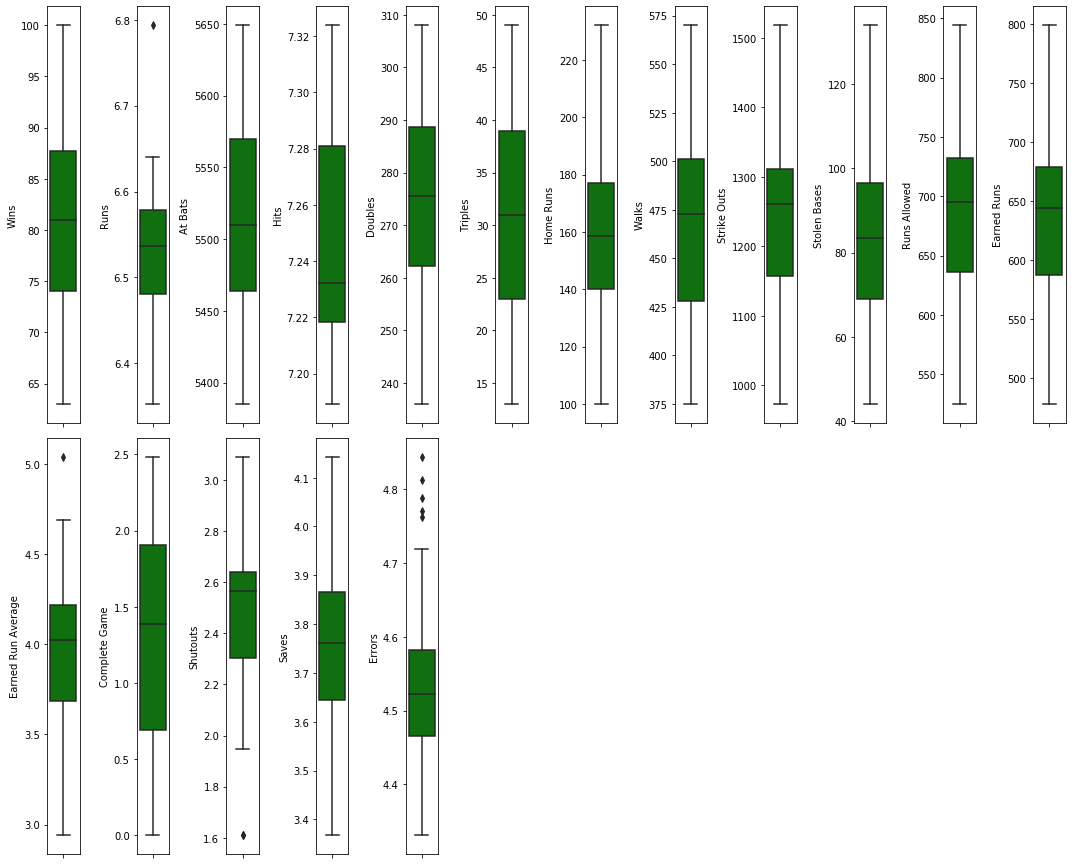

In [30]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [31]:
#separating independent and dependent variables
df_x=df.drop(columns=['Wins'])
y=df[['Wins']]

In [32]:
#Scaling the data using StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(df_x)

In [33]:
from sklearn.decomposition import PCA
pca=PCA(3)
df_x=pca.fit_transform(df_x)
df_x=pd.DataFrame(data=df_x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)

In [35]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(22, 3) (8, 3)
(22, 1) (8, 1)


In [36]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [37]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [38]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.9218545208773847
Mean_Squared_Error = 11.599719557263198
Mean_Absolute_Error = 3.057354342015554
Cross_Val_Score =  -2.322919286888106


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.9055323428970734
Mean_Squared_Error = 14.022542851215675
Mean_Absolute_Error = 3.470726718197927
Cross_Val_Score =  -3.955730238669086


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.9204934489256874
Mean_Squared_Error

In [39]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.921855,11.600,3.057,-2.323
1,Lasso,0.905532,14.023,3.471,-3.956
2,Ridge,0.920493,11.802,3.119,-2.456
3,ElasticNet,0.877165,18.233,3.898,-4.848
4,DecisionTreeRegressor,0.685895,46.625,5.875,-7.876
5,KNeighborsRegressor,0.658644,50.670,6.150,-10.189
6,AdaBoostRegressor,0.749014,37.256,5.598,-5.405
7,RandomForestRegressor,0.594745,60.155,7.100,-6.311
8,GradientBoostingRegressor,0.722903,41.132,5.767,-6.537
9,XGBRegressor,0.770798,34.022,5.383,-6.062


In [40]:
#Lets use GridsearchCV for hyperparamenter tuning for Ridge
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [41]:
pipeline=Pipeline([("ss",StandardScaler()),("RI",Ridge())])
parameters = {"RI__max_iter":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'RI__max_iter': 10}

In [42]:
pipeline_RI=Pipeline([("ss",StandardScaler()),("RI",Ridge(max_iter=10))])
maxr2_score(pipeline_RI,df_x,y)

max r2 score corresponding to  42  is  0.9140880223575006


42

In [43]:
from sklearn.externals import joblib
joblib.dump(RI,'Baseball_RI.pkl')

['Baseball_RI.pkl']